# Energy consumption this century (2000-2100)

In this notebook we will explore some ways that you might model the amount of energy that we will consume this century. We will start by loading the values of variables from the previous notebook (**you must have run the previous notebook successfully to continue**).

Load modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

and load arrays from the previous notebook

In [2]:
t = np.load('t.npy')
N = np.load('N.npy')
E = np.load('E.npy')
gdpPerCapita = np.load('gdpPerCapita.npy')
energyPerCapita = np.load('energyPerCapita.npy')
energyPerDollar = np.load('energyPerDollar.npy')

## Energy per capita

We could extrapolate the energy per capita and then multiply it by the size of the population (`N`). Looking at the plot in the previous notebook, it seems like the past 50 yr (1970-2020) have been approximately linear growth in energy per capita. We could try fitting a polynomial to those data. Try experimenting with the order of the polynomial and the starting year that you use.

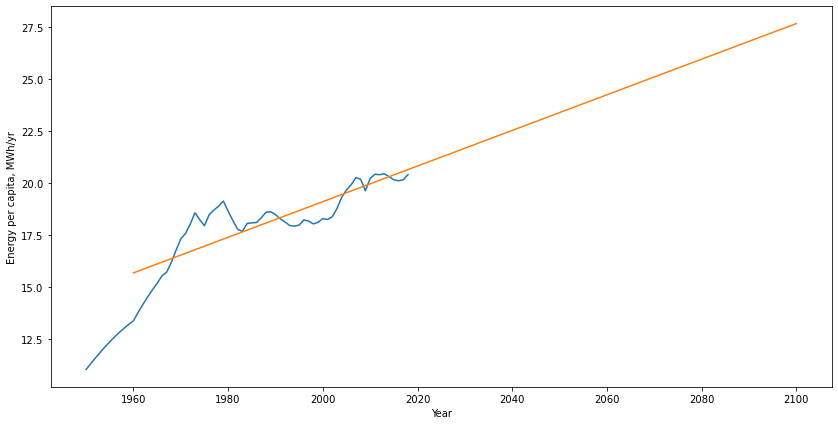

In [3]:
polynomialOrder = 1
startYear = 1960

select = np.logical_and(t >= startYear, t <= 2018)

modelParameters = np.polyfit(t[select],energyPerCapita[select],polynomialOrder)
modelFuncEnergyPC = np.poly1d(modelParameters)

select = (t >= startYear)

plt.figure(figsize=[14,7])
plt.plot(t, energyPerCapita)
plt.plot(t[select], modelFuncEnergyPC(t[select]) )
plt.xlabel('Year')
plt.ylabel('Energy per capita, MWh/yr')
plt.show()

## GDP growth and energy efficiency gains

We could assume that GDP per capita will grow linearly, because it seems to be very linear and we can reasonably expect continuing improvements in productivity and technology. However, energy efficiency is also dramatically improving. The final energy consumption is given by

***Energy use = Population size (N) * GDP per capita * Energy used per USD***



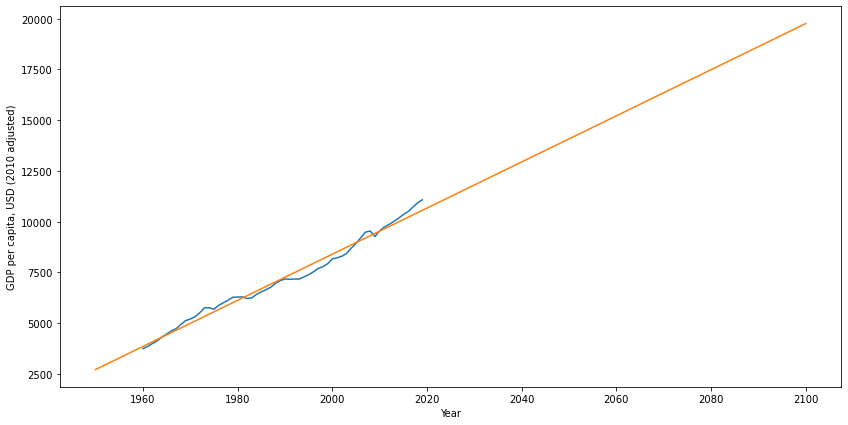

In [4]:
polynomialOrder = 1

# select all valid numeric values
select = np.logical_not(np.isnan(gdpPerCapita))

modelParameters = np.polyfit(t[select],gdpPerCapita[select],polynomialOrder)
modelFuncGdpPC = np.poly1d(modelParameters)

plt.figure(figsize=[14,7])
plt.plot(t, gdpPerCapita)
plt.plot(t, modelFuncGdpPC(t) )
plt.xlabel('Year')
plt.ylabel('GDP per capita, USD (2010 adjusted)')
plt.show()

### Energy used per USD of GDP

Eficiency gains are being realised, but it does not make sense to fit a polynomial to the data, because some energy will always be needed to generate wealth. If we assume an exponential form to the fit (after infinite time, we might become infinitely efficient and the energy used becomes negligible), then we can regress *log(Energy used)* against *USD of GDP* to produce an exponential model.

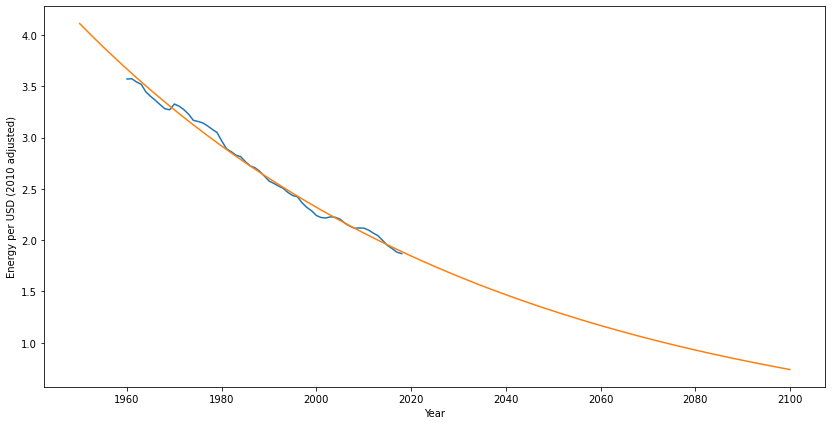

In [5]:
polynomialOrder = 1

# select all valid numeric values
select = np.logical_not(np.isnan(energyPerDollar))

modelParameters = np.polyfit(t[select],np.log(energyPerDollar[select]),polynomialOrder)
modelFuncLogEnergyPerDollar = np.poly1d(modelParameters)
modelEnergyPerDollar = np.exp(modelFuncLogEnergyPerDollar(t))

plt.figure(figsize=[14,7])
plt.plot(t, energyPerDollar)
plt.plot(t, modelEnergyPerDollar)
plt.xlabel('Year')
plt.ylabel('Energy per USD (2010 adjusted)')
plt.show()

## Energy used this century

You are now in a position to evaluate these approaches, construct new ones, and make various estimates of how much energy is likely to be consumed in any particular year this century. You can use some of the different UN population projections, and some different ways of calculating future energy use.

Remember that `energyPerDollar` is in units of kWh/USD, and population `N` is in units of millions, but total energy usage `E` is in units of TWh, so  

`E = energyPerDollar * gdpPerCapita * N / 1000`.